In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
def get_clf_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}\
    F1: {3:.4f}'.format(accuracy,precision,recall,f1))

In [4]:
vote_df=pd.read_csv('PR2_train.csv')
vote_df

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,43375,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,...,1,1,1,1,1,0,1,0,1,1
1,4486,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,...,1,1,1,1,1,0,1,0,1,1
2,10262,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,...,1,1,0,1,1,0,1,0,1,0
3,14088,4.0,182,1.0,2969,1.0,1955,4.0,4630,1.0,...,0,1,0,1,1,0,1,0,1,1
4,13398,4.0,549,5.0,1679,5.0,481,3.0,595,1.0,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36420,16511,1.0,312,5.0,965,5.0,499,1.0,1188,1.0,...,1,1,0,1,1,0,1,1,1,1
36421,33507,3.0,474,4.0,1033,5.0,602,2.0,703,1.0,...,1,1,1,1,1,0,1,1,1,1
36422,44917,2.0,617,4.0,1262,2.0,709,1.0,1063,2.0,...,1,1,0,1,1,0,1,1,1,1
36423,36126,5.0,294,1.0,985,1.0,504,3.0,613,5.0,...,1,1,1,1,1,1,1,1,1,1


In [49]:
vote_df


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,742,...,1,1,1,1,1,0,1,0,1,1
1,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,3077,...,1,1,1,1,1,0,1,0,1,1
2,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,1474,...,1,1,0,1,1,0,1,0,1,0
3,4.0,182,1.0,2969,1.0,1955,4.0,4630,1.0,1321,...,0,1,0,1,1,0,1,0,1,1
4,4.0,549,5.0,1679,5.0,481,3.0,595,1.0,1202,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36420,1.0,312,5.0,965,5.0,499,1.0,1188,1.0,437,...,1,1,0,1,1,0,1,1,1,1
36421,3.0,474,4.0,1033,5.0,602,2.0,703,1.0,782,...,1,1,1,1,1,0,1,1,1,1
36422,2.0,617,4.0,1262,2.0,709,1.0,1063,2.0,1728,...,1,1,0,1,1,0,1,1,1,1
36423,5.0,294,1.0,985,1.0,504,3.0,613,5.0,551,...,1,1,1,1,1,1,1,1,1,1


투표 비율 살펴보기.

인덱스 항목 제거하고 , 투표 여부인 61번째 항목 따로 뽑기.

관련성이 없어보이는 것들을 제거 해보겠습니다.
#vote_drop=vote_df.drop('index',axis=1,inplace=True)
#vote_drop2=vote_df.drop('familysize',axis=1,inplace=True)
지울것 : hand married engnat.. 
무응답자들을 평균치로 바꾸면 좋을 듯


In [48]:
droplist=['hand','married','engnat']
vote_droplist=vote_df.drop(droplist,axis=1,inplace=True)

In [47]:
a_to_t=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','s','t']
Q_A=[]
for i in range(18):
    string='Q'+a_to_t[i]+'A'
    Q_A.append(string)
vote_df[Q_A].head()


,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QsA,QtA
0,1.0,5.0,5.0,1.0,1.0,1.0,5.0,5.0,2.0,5.0,2.0,5.0,4.0,1.0,5.0,4.0,5.0,5.0
1,1.0,5.0,5.0,1.0,1.0,3.0,1.0,4.0,5.0,5.0,2.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0
2,5.0,1.0,2.0,1.0,3.0,5.0,4.0,3.0,5.0,3.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,4.0
3,4.0,1.0,1.0,4.0,1.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,1.0,4.0,4.0,5.0,2.0,5.0
4,4.0,5.0,5.0,3.0,1.0,1.0,1.0,2.0,1.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0


(array([10849.,     0.,  6225.,     0.,     0.,  3238.,     0.,  8033.,
            0.,  8080.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

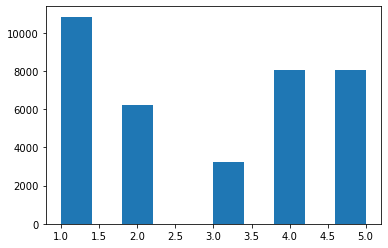

In [45]:
plt.hist(vote_df['QbA'],bins=10)

In [51]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 73 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   QaA        36425 non-null  float64
 1   QaE        36425 non-null  int64  
 2   QbA        36425 non-null  float64
 3   QbE        36425 non-null  int64  
 4   QcA        36425 non-null  float64
 5   QcE        36425 non-null  int64  
 6   QdA        36425 non-null  float64
 7   QdE        36425 non-null  int64  
 8   QeA        36425 non-null  float64
 9   QeE        36425 non-null  int64  
 10  QfA        36425 non-null  float64
 11  QfE        36425 non-null  int64  
 12  QgA        36425 non-null  float64
 13  QgE        36425 non-null  int64  
 14  QhA        36425 non-null  float64
 15  QhE        36425 non-null  int64  
 16  QiA        36425 non-null  float64
 17  QiE        36425 non-null  int64  
 18  QjA        36425 non-null  float64
 19  QjE        36425 non-null  int64  
 20  QkA   

In [52]:
myindexlist=[]
for i in range(0,72):
    myindexlist.append(i)
del myindexlist[56]
myindexlist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

In [53]:
vote_result=vote_df['voted']
vote_data=vote_df.iloc[:,myindexlist]


데이터에 있는 str을 int로 다 변환(인종 종교 성별)

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(vote_df['gender'])
vote_df['gender'] = le.transform(vote_df['gender'])
vote_df['gender']
le = preprocessing.LabelEncoder()
le = le.fit(vote_df['religion'])
vote_df['religion'] = le.transform(vote_df['religion'])
vote_df['religion']
le = preprocessing.LabelEncoder()
le = le.fit(vote_df['race'])
vote_df['race'] = le.transform(vote_df['race'])
vote_df['race']
le = preprocessing.LabelEncoder()
le = le.fit(vote_df['age_group'])
vote_df['age_group'] = le.transform(vote_df['age_group'])
vote_df['age_group']

vote_df

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,742,...,1,1,1,1,1,0,1,0,1,1
1,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,3077,...,1,1,1,1,1,0,1,0,1,1
2,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,1474,...,1,1,0,1,1,0,1,0,1,0
3,4.0,182,1.0,2969,1.0,1955,4.0,4630,1.0,1321,...,0,1,0,1,1,0,1,0,1,1
4,4.0,549,5.0,1679,5.0,481,3.0,595,1.0,1202,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36420,1.0,312,5.0,965,5.0,499,1.0,1188,1.0,437,...,1,1,0,1,1,0,1,1,1,1
36421,3.0,474,4.0,1033,5.0,602,2.0,703,1.0,782,...,1,1,1,1,1,0,1,1,1,1
36422,2.0,617,4.0,1262,2.0,709,1.0,1063,2.0,1728,...,1,1,0,1,1,0,1,1,1,1
36423,5.0,294,1.0,985,1.0,504,3.0,613,5.0,551,...,1,1,1,1,1,1,1,1,1,1


테스트 트레인 세트 분류하기.

In [54]:
X_train,X_test,y_train,y_test=train_test_split(vote_data, vote_result, test_size=0.2, random_state=0)
print("트레인 데이터 분포 : \n",y_train.value_counts())
print("\n테스트 데이터 분포 : \n",y_test.value_counts())
print("X트레인 : ",X_train.value_counts())
print("X테스트 : ",X_test.value_counts())

트레인 데이터 분포 : 
 0    15920
1    13220
Name: voted, dtype: int64

테스트 데이터 분포 : 
 0    3998
1    3287
Name: voted, dtype: int64
X트레인 :  QaA  QaE     QbA  QbE   QcA  QcE   QdA  QdE   QeA  QeE   QfA  QfE   QgA  QgE   QhA  QhE   QiA  QiE   QjA  QjE   QkA  QkE   QlA  QlE   QmA  QmE   QnA  QnE   QoA  QoE   QpA  QpE   QqA  QqE   QrA  QrE     QsA  QsE   QtA  QtE   age_group  education  gender  race  religion  tp01  tp02  tp03  tp04  tp05  tp06  tp07  tp08  tp09  tp10  urban  wf_01  wf_02  wf_03  wr_01  wr_02  wr_03  wr_04  wr_05  wr_06  wr_07  wr_08  wr_09  wr_10  wr_11  wr_12
1.0  27      2.0  1169  3.0  752   3.0  797   2.0  1973  4.0  619   2.0  479   1.0  1029  4.0  1292  3.0  1253  5.0  1810  4.0  1166  4.0  1462  4.0  366   4.0  1334  1.0  724   3.0  547   4.0  1099    4.0  469   1.0  735   1          3          0       1     0         1     2     2     4     0     2     1     4     4     6     3      0      0      1      1      1      0      1      1      1      1      1      0      1    

비슷하게 나누어진 것 확인.

In [26]:
vote_df

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,742,...,1,1,1,1,1,0,1,0,1,1
1,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,3077,...,1,1,1,1,1,0,1,0,1,1
2,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,1474,...,1,1,0,1,1,0,1,0,1,0
3,4.0,182,1.0,2969,1.0,1955,4.0,4630,1.0,1321,...,0,1,0,1,1,0,1,0,1,1
4,4.0,549,5.0,1679,5.0,481,3.0,595,1.0,1202,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36420,1.0,312,5.0,965,5.0,499,1.0,1188,1.0,437,...,1,1,0,1,1,0,1,1,1,1
36421,3.0,474,4.0,1033,5.0,602,2.0,703,1.0,782,...,1,1,1,1,1,0,1,1,1,1
36422,2.0,617,4.0,1262,2.0,709,1.0,1063,2.0,1728,...,1,1,0,1,1,0,1,1,1,1
36423,5.0,294,1.0,985,1.0,504,3.0,613,5.0,551,...,1,1,1,1,1,1,1,1,1,1


In [56]:
dt_clf=DecisionTreeClassifier(random_state=0)
rf_clf=RandomForestClassifier(random_state=0)
lr_clf=LogisticRegression()

dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

dt_pred=dt_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
lr_pred=lr_clf.predict(X_test)





print("결정 트리")
get_clf_eval(y_test,dt_pred)
print("랜덤 포레스트")
get_clf_eval(y_test,rf_pred)
print("로지스틱")
get_clf_eval(y_test,lr_pred)



C:\Users\jeon\anaconda3\envs\ssu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


결정 트리
오차 행렬
[[2587 1411]
 [1375 1912]]
정확도: 0.6176, 정밀도: 0.5754, 재현율: 0.5817    F1: 0.5785
랜덤 포레스트
오차 행렬
[[2655 1343]
 [ 898 2389]]
정확도: 0.6924, 정밀도: 0.6401, 재현율: 0.7268    F1: 0.6807
로지스틱
오차 행렬
[[3961   37]
 [3269   18]]
정확도: 0.5462, 정밀도: 0.3273, 재현율: 0.0055    F1: 0.0108
